In [1]:
import numpy as np
import pandas as pd
import datashader as ds
from numba import jit
from datashader import transfer_functions as tf
from colorcet import palette
from matplotlib import pyplot as plt
from matplotlib import colors
from math import sin, cos
import yaml

/Users/mikkelhartmannjensen/Documents/projects/mikmik19.github.com/notebooks/env/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mikkelhartmannjensen/Documents/projects/mikmik19.github.com/notebooks/env/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Symmetric Fractals


In [2]:
@jit
def get_symmetry_element(n_sym):
    # Select a random element a symmetry group
    rand_int = np.random.randint(n_sym)
    radians = np.arange(0,2*np.pi,2*np.pi/n_sym)
    radian = radians[rand_int]
    return radian

@jit
def rotate_point(x, y, radian):
    x_new = x*cos(radian)-y*sin(radian)
    y_new = x*sin(radian)+y*cos(radian)
    return x_new, y_new

@jit
def affine_map(x, y, a_11, a_12, a_21, a_22, b_1, b_2, n_sym):
    x_new = a_11*x + a_12*y + b_1
    y_new = a_21*x + a_22*y + b_2
    
    radian = get_symmetry_element(n_sym)
    x, y = rotate_point(x_new, y_new, radian) 
    return x,y

@jit
def trajectory(fn, x0, y0, *params):
    n_iter=100_000_000
    x, y = np.zeros(n_iter), np.zeros(n_iter)
    x[0], y[0] = x0, y0
    for i in np.arange(n_iter-1):
        x[i+1], y[i+1] = fn(x[i], y[i], *params)
    return pd.DataFrame(dict(x=x,y=y))

def plot_fractal(fn, x0, y0, *params):
    df = trajectory(fn, x0, y0, *params[1:])

    canvas = ds.Canvas(plot_width = 450, plot_height = 450)
    aggregated = canvas.points(df[1000:], 'x', 'y')
    img = tf.shade(aggregated, cmap=palette[params[0]])
    return img

def save_figures(images, file_name):
    for i, img in enumerate(images):
        ds.utils.export_image(
            img=img,
            filename=f'../assets/img/symmetric-fractals/{file_name}-{i}',
            fmt=".png",
            background=None)
    return images

## Symmetric fractals

In [3]:
vals = yaml.load(
        open("../data/symmetric-fractals/fractal-parameters.yml","r"))


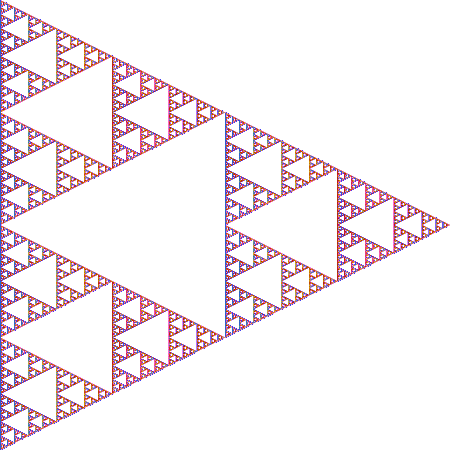
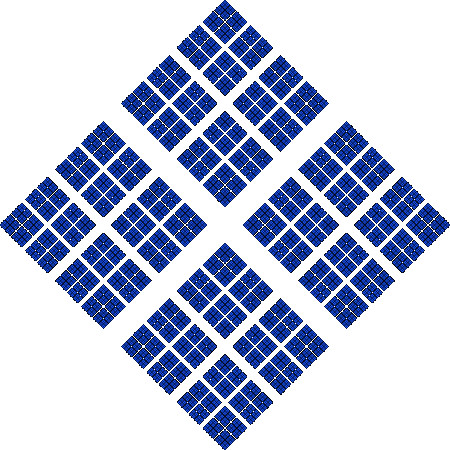
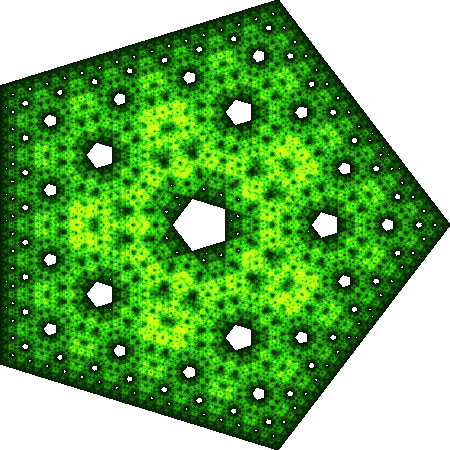
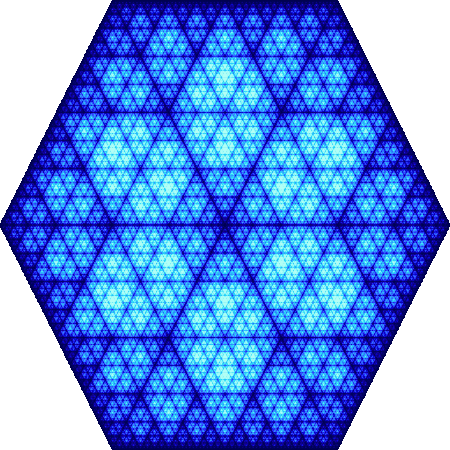
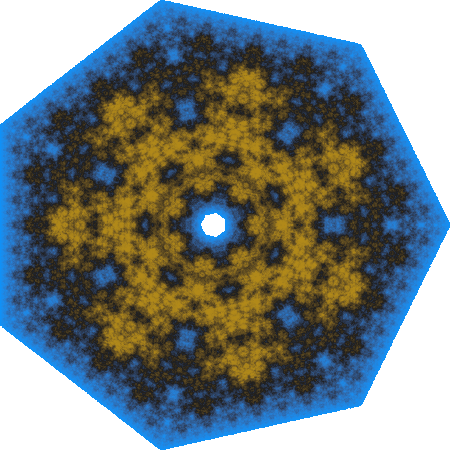
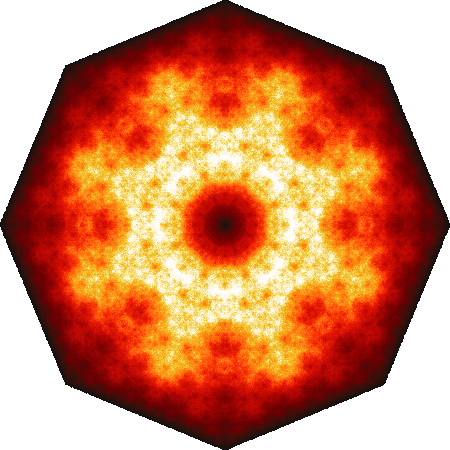
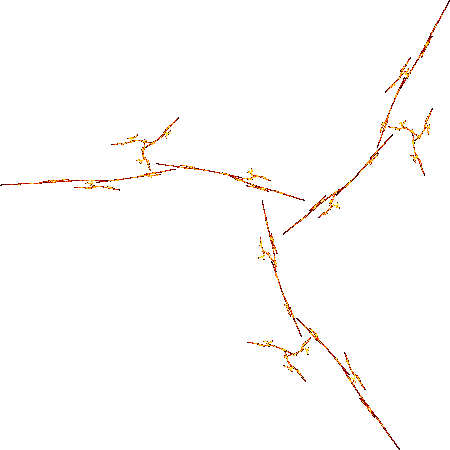
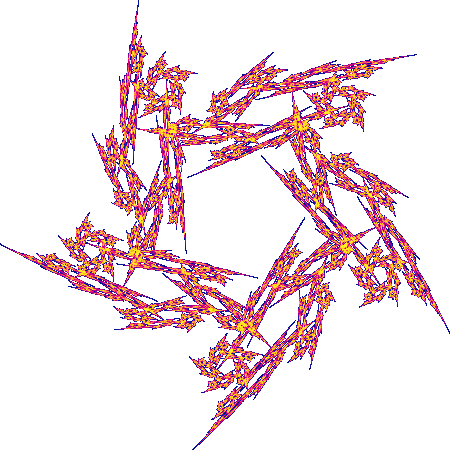
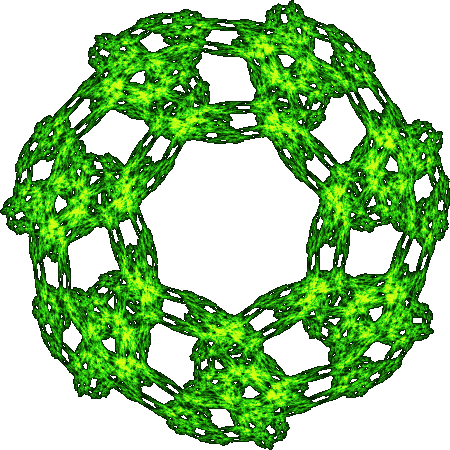
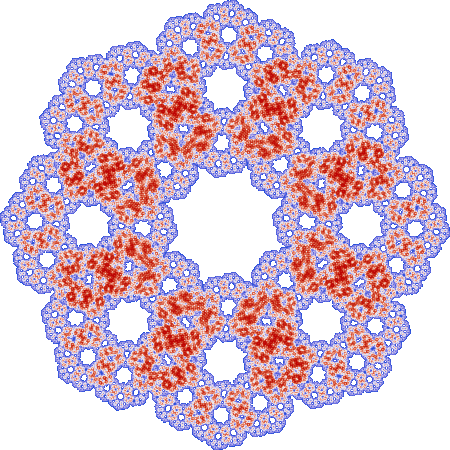
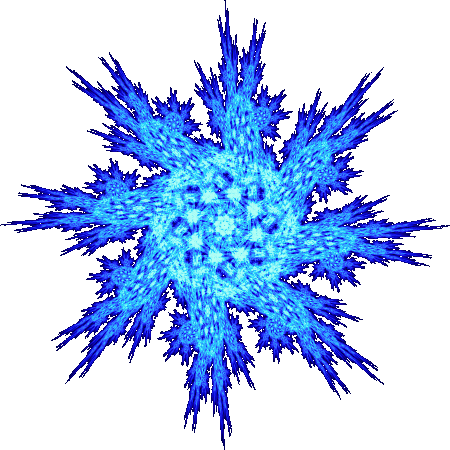
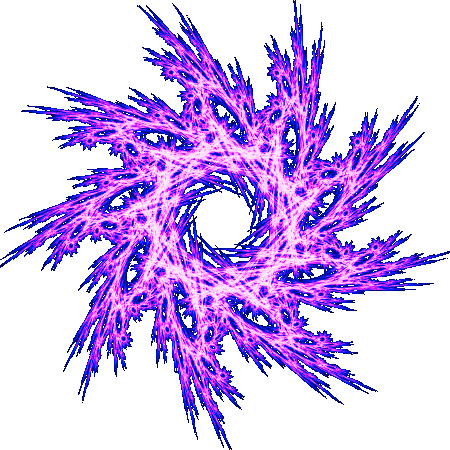
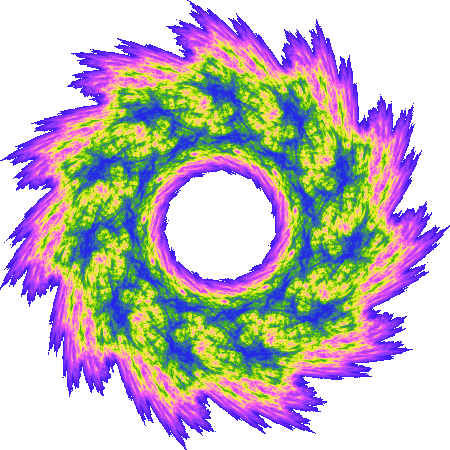
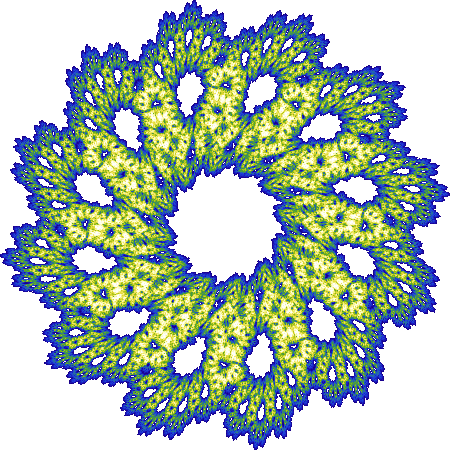
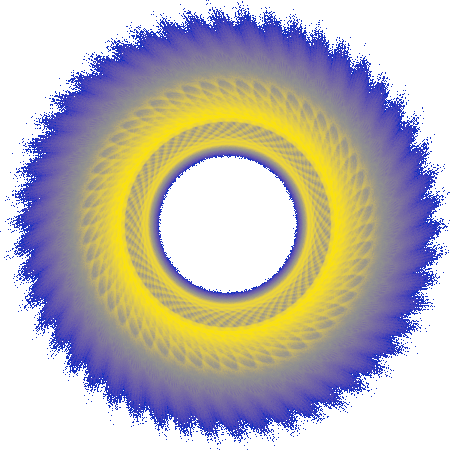
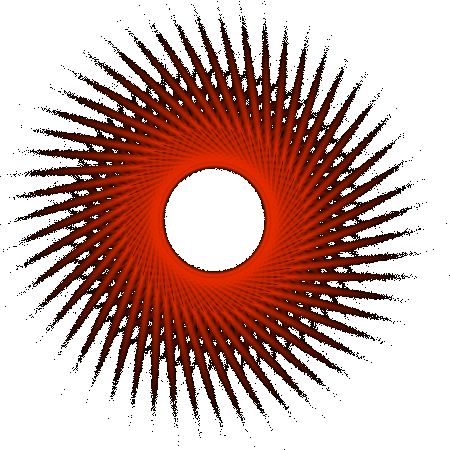

In [4]:
imgs = [plot_fractal(affine_map, 10, 10, *params) for params in vals]
tf.Images(*imgs).cols(4)

In [5]:
save_figures(imgs, 'fractal');